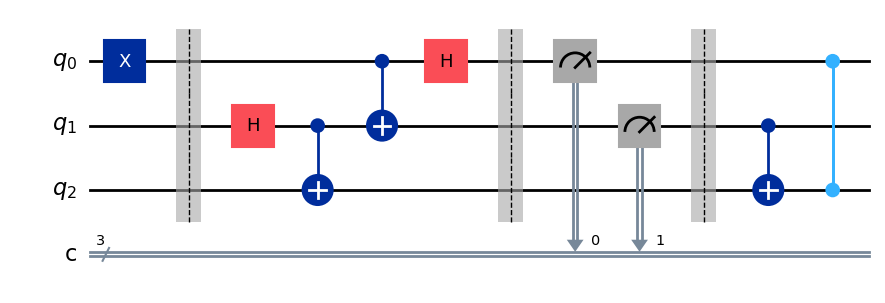

In [9]:
# Teleportation protocol

from qiskit import *
# import numpy as np

circuit = QuantumCircuit(3, 3)

%matplotlib inline
# circuit.draw(style='iqx', output='mpl')

# alpha = np.sqrt(0.2)
# beta = np.sqrt(0.8)

# circuit.initialize([alpha, beta], 0)

circuit.x(0)
circuit.barrier()

circuit.h(1)
circuit.cx(1, 2)

circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

circuit.measure([0, 1], [0, 1])
circuit.barrier()


# Obtaining results from classical bits for the 2nd qubit
circuit.cx(1, 2)
circuit.cz(0, 2)

circuit.draw(style='iqp', output='mpl')

#### Bell state

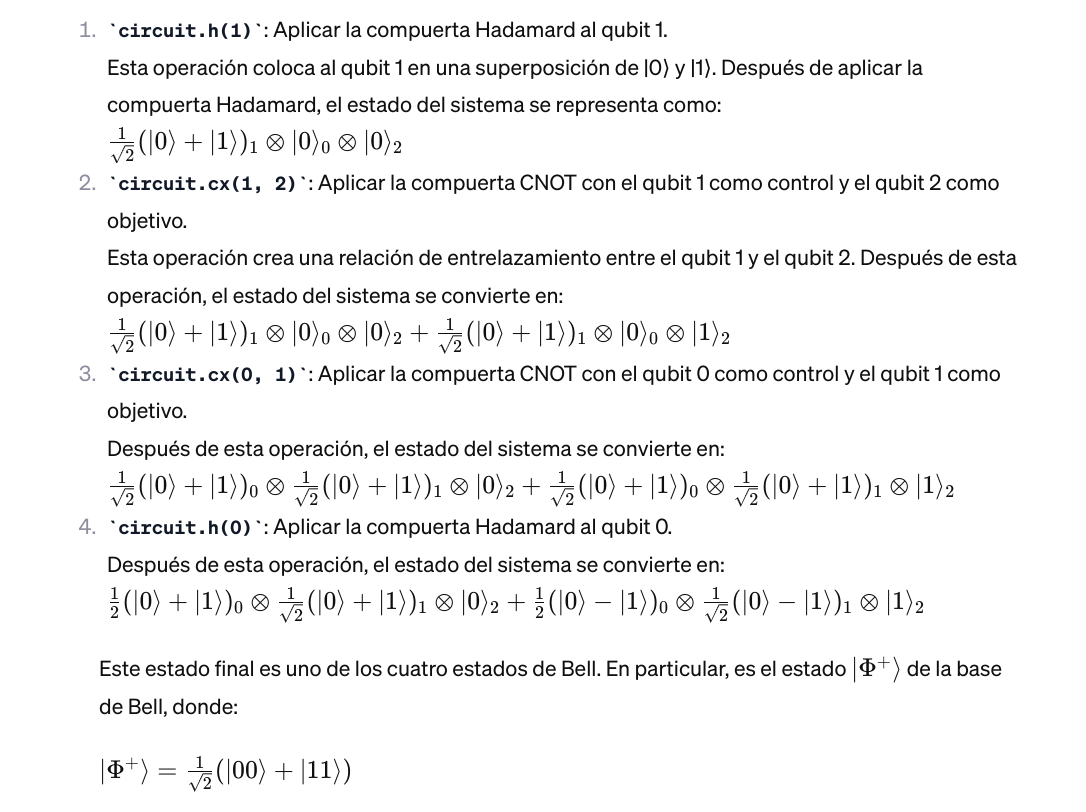

#### Measurements on quibits 0 and 1

    - La instrucción circuit.measure([0, 1], [0, 1]) en el código realiza mediciones en los qubits 0 y 1 y almacena los resultados en los bits clásicos 0 y 1, respectivamente. Después de estas mediciones, el estado cuántico colapsará y el resultado de las mediciones será clásico.

    - Dado que la teletransportación cuántica implica enviar información clásica sobre las mediciones a través de un canal clásico, se puede utilizar la información medida en los qubits 0 y 1 para realizar algunas operaciones en el qubit 2 y recuperar el estado original que se estaba intentando teleportar. Este proceso está vinculado al protocolo de teletransportación cuántica.
    

#### Obtaining results from classical bits for the 2nd qubit.

    En el protocolo de teletransportación cuántica, después de realizar las mediciones en los qubits 0 y 1 y enviar la información clásica correspondiente, se deben aplicar ciertas compuertas en el qubit 2 para reconstruir el estado original en el qubit 0. Las compuertas específicas son:

1 - Compuerta X en el qubit 2 si el resultado de la medición en el qubit 1 fue 1:

- Si el bit clásico asociado al qubit 1 es 1, aplicamos una compuerta X al qubit 2.

2 - Compuerta Z en el qubit 2 si el resultado de la medición en el qubit 0 fue 1:

- Si el bit clásico asociado al qubit 0 es 1, aplicamos una compuerta Z al qubit 2.



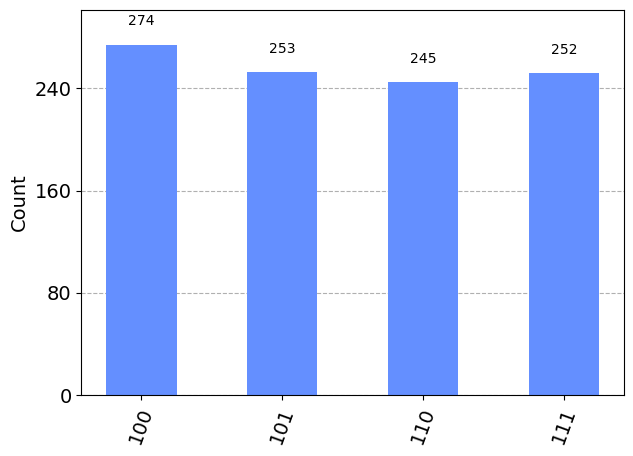

In [10]:
# This measure is for the 3rd qubit
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [8]:
# The states in the histogram are in the order of the classical bits.
# The state of the 3rd qubit is the same as the state of the 1st qubit before the teleportation protocol.
# The state of the 2nd qubit is not affected by the teleportation protocol.
# The state of the 1st qubit is destroyed after the teleportation protocol.
print(counts)

{'000': 46, '010': 43, '001': 52, '110': 209, '101': 194, '011': 48, '111': 224, '100': 208}


In [ ]:
# this circuit will have a diferent state initialization in the 1st qubit
circuit2 = QuantumCircuit(3, 3)
